<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter Degree: 3
Degree--> 3
Epoch 0, MSE: 30.423204725555387
Epoch 100, MSE: 1.3908341279112204
Epoch 200, MSE: 1.3345302232492764
Epoch 300, MSE: 1.2995102831701812
Epoch 400, MSE: 1.2708367941539405
Epoch 500, MSE: 1.2468052421442177
Epoch 600, MSE: 1.2266238472876478
Epoch 700, MSE: 1.2096666015163222
Epoch 800, MSE: 1.1954111399483356
Epoch 900, MSE: 1.1834198704100514


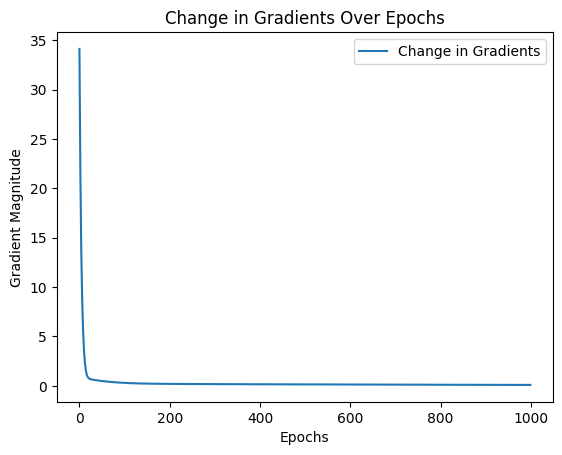

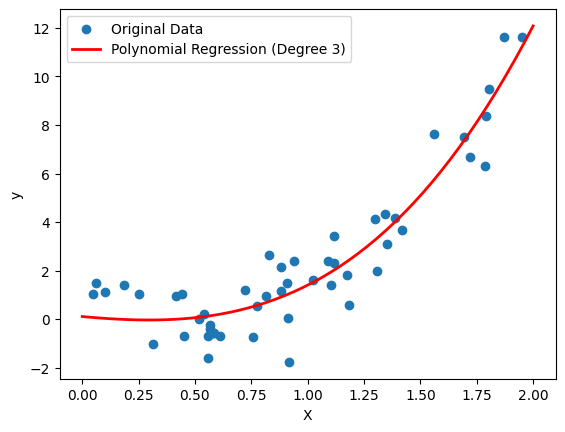

In [3]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to generate sample data for polynomial regression
def generate_sample_data(seed=42):
    # Set the degree of the polynomial
    print('Degree-->', degree)

    # Generate random data points
    np.random.seed(seed)
    X = 2 * np.random.rand(50, 1)
    y = 1.5 * X**degree + np.random.randn(50, 1)
    return X, y

# Function to perform polynomial regression using gradient descent
def polynomial_regression(X, y, degree, learning_rate, num_epochs):
    # Initialize parameters randomly
    theta = np.random.randn(degree + 1, 1)  # Adjusted to match the degree
    gradient_history = []
    MSEs = []
    Epochs = []

    # Perform gradient descent
    for epoch in range(num_epochs):
        X_poly = add_polynomial_features(X, degree)
        y_pred = X_poly.dot(theta)

        # Compute mean squared error
        mse = calculate_mse(y_pred, y)

        # Compute gradients
        gradients = compute_gradients(X_poly, y_pred, y)

        # Update parameters using gradient descent
        theta = update_parameters(theta, learning_rate, gradients)

        # Store values for visualization
        Epochs.append(epoch)
        MSEs.append(mse)
        gradient_history.append(np.linalg.norm(gradients))

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, MSE: {mse}")

    # Plotting the change in gradients over epochs
    plot_gradient_changes(Epochs, gradient_history)

    return theta, Epochs, MSEs

# Function to add polynomial features to input data
def add_polynomial_features(X, degree):
    X_poly = np.c_[X]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X**d]
    return np.c_[np.ones((X.shape[0], 1)), X_poly]

# Function to calculate Mean Squared Error
def calculate_mse(y_pred, y):
    return np.mean((y_pred - y)**2)

# Function to compute gradients for gradient descent
def compute_gradients(X_poly, y_pred, y):
    return 2/X_poly.shape[0] * X_poly.T.dot(y_pred - y)

# Function to update parameters using gradient descent
def update_parameters(theta, learning_rate, gradients):
    return theta - learning_rate * gradients

# Function to plot the change in gradients over epochs
def plot_gradient_changes(Epochs, gradient_history):
    plt.plot(Epochs, gradient_history, label='Change in Gradients')
    plt.xlabel('Epochs')
    plt.ylabel('Gradient Magnitude')
    plt.title('Change in Gradients Over Epochs')
    plt.legend()
    plt.show()

# Function to generate and plot predictions based on polynomial regression
def generate_and_plot_predictions(X, y, degree, learning_rate, num_epochs):
    # Perform polynomial regression
    theta, _, _ = polynomial_regression(X, y, degree, learning_rate, num_epochs)

    # Generate new data for plotting predictions
    X_new = np.linspace(0, 2, 50).reshape(50, 1)
    X_new_poly = add_polynomial_features(X_new, degree)
    y_pred = X_new_poly.dot(theta)

    # Plot the original data and the polynomial regression predictions
    plt.scatter(X, y, label='Original Data')
    plt.plot(X_new, y_pred, 'r-', label=f'Polynomial Regression (Degree {degree})', linewidth=2)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Get user input for the degree of the polynomial
degree = int(input("Enter Degree: "))

# Generate sample data and set hyperparameters
X, y = generate_sample_data(degree)
learning_rate = 0.01
num_epochs = 1000

# Generate and plot predictions
generate_and_plot_predictions(X, y, degree, learning_rate, num_epochs)